### Mortality and Readmission Outcomes of a Heart Failure Cohort

#### Part 1:  Data Preparation

#### Data Source: Physionet: Hospitalized Patients with Heart Failure (Zhang et al., 2020)

### Outline
I.  Data Loading and Initial Exploration

II. Data Preparation

    A.  Examining Columns
        1. Customizing column names
        2. Dropping columns
    B.  Filling-in Missing Values
        1.  Custom codes
        2.  Fill by central tendency or imputation, as appropriate
    C.  Adjusting Dtypes 
    D.  Rechecking column values
    E.  Rearranging columns 

#### I. Data Loading and Inital Exploration

In [438]:
# HF EHR and outcome
import pandas as pd
pd.options.display.max_columns = 170
pd.options.display.max_colwidth = 100
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat

In [439]:
# loading de-identified data
hf = pd.read_csv('dat.csv', header =0, usecols = [ 'DestinationDischarge',
 'admission.ward', 'admission.way', 'occupation','discharge.department', 'visit.times',
 'gender','body.temperature', 'pulse', 'respiration', 'systolic.blood.pressure',
 'diastolic.blood.pressure', 'map', 'weight','height','BMI','type.of.heart.failure','NYHA.cardiac.function.classification',
 'Killip.grade', 'myocardial.infarction', 'congestive.heart.failure', 'peripheral.vascular.disease',
 'cerebrovascular.disease', 'dementia', 'Chronic.obstructive.pulmonary.disease',
 'connective.tissue.disease','peptic.ulcer.disease', 'diabetes','moderate.to.severe.chronic.kidney.disease',
 'hemiplegia','leukemia', 'malignant.lymphoma', 'solid.tumor', 'liver.disease',
 'AIDS','CCI.score','type.II.respiratory.failure','consciousness', 'eye.opening',
 'verbal.response','movement','respiratory.support.','oxygen.inhalation', 'fio2',
 'acute.renal.failure', 'LVEF', 'left.ventricular.end.diastolic.diameter.LV',
 'mitral.valve.EMS', 'mitral.valve.AMS', 'EA', 'tricuspid.valve.return.velocity',
 'tricuspid.valve.return.pressure', 'outcome.during.hospitalization',
 'death.within.28.days', 're.admission.within.28.days','death.within.3.months',
 're.admission.within.3.months','death.within.6.months','re.admission.within.6.months',
 'time.of.death..days.from.admission.','re.admission.time..days.from.admission.',
 'return.to.emergency.department.within.6.months','time.to.emergency.department.within.6.months',
 'creatinine.enzymatic.method','urea', 'uric.acid', 'glomerular.filtration.rate',
 'cystatin', 'white.blood.cell', 'monocyte.ratio', 'monocyte.count',
 'red.blood.cell','coefficient.of.variation.of.red.blood.cell.distribution.width',
 'standard.deviation.of.red.blood.cell.distribution.width', 'mean.corpuscular.volume',
 'hematocrit','lymphocyte.count','mean.hemoglobin.volume','mean.hemoglobin.concentration',
 'mean.platelet.volume', 'basophil.ratio', 'basophil.count', 'eosinophil.ratio',
 'eosinophil.count','hemoglobin', 'platelet', 'platelet.distribution.width',
 'platelet.hematocrit', 'neutrophil.ratio', 'neutrophil.count', 'D.dimer',
 'international.normalized.ratio','activated.partial.thromboplastin.time',
 'thrombin.time', 'prothrombin.activity','prothrombin.time.ratio','fibrinogen',
 'high.sensitivity.troponin', 'myoglobin', 'carbon.dioxide.binding.capacity',
 'calcium', 'potassium', 'chloride', 'sodium','Inorganic.Phosphorus','serum.magnesium',
 'creatine.kinase.isoenzyme.to.creatine.kinase','hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase',
 'hydroxybutyrate.dehydrogenase','glutamic.oxaloacetic.transaminase','creatine.kinase',
 'creatine.kinase.isoenzyme','lactate.dehydrogenase','brain.natriuretic.peptide',
 'high.sensitivity.protein','nucleotidase','fucosidase','albumin', 'white.globulin.ratio',
 'cholinesterase','glutamyltranspeptidase','glutamic.pyruvic.transaminase',
 'glutamic.oxaliplatin','indirect.bilirubin', 'alkaline.phosphatase', 'globulin',
 'direct.bilirubin', 'total.bilirubin', 'total.bile.acid', 'total.protein',
 'erythrocyte.sedimentation.rate', 'cholesterol', 'low.density.lipoprotein.cholesterol',
 'triglyceride', 'high.density.lipoprotein.cholesterol','homocysteine',
 'apolipoprotein.A','apolipoprotein.B', 'lipoprotein','pH', 'standard.residual.base',
 'standard.bicarbonate','partial.pressure.of.carbon.dioxide','total.carbon.dioxide',
 'methemoglobin','hematocrit.blood.gas','reduced.hemoglobin', 'potassium.ion',
 'chloride.ion','sodium.ion', 'glucose.blood.gas', 'lactate','measured.residual.base',
 'measured.bicarbonate','carboxyhemoglobin','body.temperature.blood.gas',
 'oxygen.saturation','partial.oxygen.pressure','oxyhemoglobin','anion.gap',
 'free.calcium','total.hemoglobin','GCS', 'dischargeDay', 'ageCat'])
hf.head()

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,LVEF,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,mitral.valve.AMS,EA,tricuspid.valve.return.velocity,tricuspid.valve.return.pressure,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,time.of.death..days.from.admission.,re.admission.time..days.from.admission.,return.to.emergency.department.within.6.months,time.to.emergency.department.within.6.months,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,myoglobin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,Inorganic.Phosphorus,serum.magnesium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,cholinesterase,glutamyltranspeptidase,glutamic.pyruvic.transaminase,glutamic.oxaliplatin,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,erythrocyte.sedimentation.rate,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,homocysteine,apolipoprotein.A,apolipoprotein.B,lipoprotein,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
0,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,III,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6,2.28,5.59,101.9,134.6,NaN,NaN,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,NaN,83.0,65.0,1.02,11.4,61.0,23.8,6.9,18.3,4.9,61.9,NaN,3.46,1.90,2.69,0.84,NaN,NaN,NaN,NaN,7.44,-3.0,22.7,32.0,22.2,0.3,37.0,3.4,5.63,103.0,136.4,5.8,2.5,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,

In [440]:
hf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 165 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   DestinationDischarge                                           object 
 1   admission.ward                                                 object 
 2   admission.way                                                  object 
 3   occupation                                                     object 
 4   discharge.department                                           object 
 5   visit.times                                                    int64  
 6   gender                                                         object 
 7   body.temperature                                               float64
 8   pulse                                                          int64  
 9   respiration                                        

#### II.A.  Data Preparation:   Examining Columns
####    1.  Customizing column names

In [441]:
hfadm = hf.iloc[:,:16]
hfadm.head()

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI
0,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125
1,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,95,18,150,70,96.666667,51.0,1.63,19.195303
2,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,98,18,102,67,78.666667,70.0,1.70,24.221453
3,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,73,19,110,74,86.000000,65.0,1.70,22.491349
4,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,88,19,134,62,86.000000,76.0,1.55,31.633715


In [442]:
# Customizing column names
hfadm.columns=['destination','ward','admission.way','occupation','discharge.dept','visit.times','gender','temp','HR','RR','SBP','DBP','MAP','Wt','Ht','BMI']
hfadm.head()

,destination,ward,admission.way,occupation,discharge.dept,visit.times,gender,temp,HR,RR,SBP,DBP,MAP,Wt,Ht,BMI
0,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125
1,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,95,18,150,70,96.666667,51.0,1.63,19.195303
2,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,98,18,102,67,78.666667,70.0,1.70,24.221453
3,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,73,19,110,74,86.000000,65.0,1.70,22.491349
4,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,88,19,134,62,86.000000,76.0,1.55,31.633715


In [443]:
hfcvd = hf.iloc[:,16:23]
hfcvd.head()

,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease
0,Both,III,III,0,0,0,0
1,Both,III,I,0,0,0,0
2,Both,II,II,0,0,0,0
3,Both,III,II,0,0,0,0
4,Both,III,II,0,0,0,0


In [444]:
hfcvd.columns = ['HF.type','NYHA','Killip','MI','CHF','PVD','CVD']
hfcvd.head(2)

,HF.type,NYHA,Killip,MI,CHF,PVD,CVD
0,Both,III,III,0,0,0,0
1,Both,III,I,0,0,0,0


In [445]:
hfco = hf.iloc[:,23:45]
hfco.head()

,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure
0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0
1,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0
2,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0
3,0,1,0,0.0,0,1.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0
4,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0


In [446]:
hfco.columns=['dementia','COPD','CTD','PUD','DM','CKD','hemiplegia','leukemia','lymphoma','solid.tumor','liver.disease','AIDS','CCI.score','RespFailureII','consciousness','GCS.E','GCS.V','GCS.M','resp.support','O2','FiO2','ARF']
hfco.head(2)

,dementia,COPD,CTD,PUD,DM,CKD,hemiplegia,leukemia,lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,RespFailureII,consciousness,GCS.E,GCS.V,GCS.M,resp.support,O2,FiO2,ARF
0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0
1,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0


In [447]:
hfecho = hf.iloc[:,45:52]
hfecho.head()

,LVEF,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,mitral.valve.AMS,EA,tricuspid.valve.return.velocity,tricuspid.valve.return.pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,40.0,1.16,1.52,NaN,3.34,47.0
2,NaN,46.0,0.84,0.12,7.00,2.80,32.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,64.0,1.20,0.90,1.33,NaN,NaN


In [448]:
hfecho.columns = ['LVEF','LVEDD','MV.EMS','MV.AMS','EA','TV.RV','TV.RP']
hfecho.head(2)

,LVEF,LVEDD,MV.EMS,MV.AMS,EA,TV.RV,TV.RP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,40.0,1.16,1.52,NaN,3.34,47.0


In [449]:
hfoutcome = hf.iloc[:,52:63]
hfoutcome.head()

,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,time.of.death..days.from.admission.,re.admission.time..days.from.admission.,return.to.emergency.department.within.6.months,time.to.emergency.department.within.6.months
0,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN
1,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN
2,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN
3,Alive,0,1,0,1,0,1,NaN,19.0,1.0,19.0
4,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN


In [450]:
hfoutcome.columns = ['hosp.outcome','mort.28d','read.28d','mort.3mo','read.3mo','mort.6mo','read.6mo','mort.time.fr.adm','read.time.fr.adm','ED.6mo','ED.time.6mo']
hfoutcome.head(2)

,hosp.outcome,mort.28d,read.28d,mort.3mo,read.3mo,mort.6mo,read.6mo,mort.time.fr.adm,read.time.fr.adm,ED.6mo,ED.time.6mo
0,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN
1,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN


In [451]:
hflabs_kidney = hf.iloc[:,63:68]
hflabs_kidney.head()

,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin
0,108.3,12.55,685.0,58.57,1.32
1,62.0,4.29,170.0,85.43,1.25
2,185.1,15.99,567.0,31.51,2.43
3,104.8,8.16,635.0,58.01,2.32
4,83.9,6.86,432.0,60.52,1.35


In [452]:
hflabs_kidney.columns = ['crea','urea','uric.acid','GFR','cystatin']
hflabs_kidney.head(2)

,crea,urea,uric.acid,GFR,cystatin
0,108.3,12.55,685.0,58.57,1.32
1,62.0,4.29,170.0,85.43,1.25


In [453]:
hflabs_cbc = hf.iloc[:,68:90]
hflabs_cbc.head()

,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count
0,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05
1,5.32,0.066,0.35,3.93,13.0,40.7,88.6,0.349,1.18,28.9,326.0,11.3,0.002,0.01,0.009,0.05,114.0,123.0,16.1,0.139,0.702,3.73
2,13.01,0.051,0.67,4.43,12.9,44.5,96.4,0.427,0.75,32.6,339.0,12.0,0.002,0.03,0.002,0.02,144.0,169.0,16.5,0.203,0.887,11.54
3,2.18,0.087,0.19,2.71,18.8,69.0,102.2,0.277,0.71,34.7,339.0,12.4,0.000,0.00,0.028,0.06,94.0,35.0,19.4,0.032,0.559,1.22
4,6.14,0.086,0.53,4.20,14.7,47.7,90.0,0.378,1.27,28.6,317.0,12.6,0.002,0.01,0.008,0.05,120.0,104.0,16.4,0.131,0.697,4.28


In [454]:
hflabs_cbc.columns = ['WBC','mono.ratio','mono.ct','RBC','CV.RBC.DW','SD.RBC.DW','MCV','Hct','lymph.ct','MHV','MHC','MPV','baso.ratio','baso.ct','eo.ratio','eo.ct','Hb','Plt','P.DW','Plt.hct','neut.ratio','neut.ct']
hflabs_cbc.head(2)

,WBC,mono.ratio,mono.ct,RBC,CV.RBC.DW,SD.RBC.DW,MCV,Hct,lymph.ct,MHV,MHC,MPV,baso.ratio,baso.ct,eo.ratio,eo.ct,Hb,Plt,P.DW,Plt.hct,neut.ratio,neut.ct
0,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05
1,5.32,0.066,0.35,3.93,13.0,40.7,88.6,0.349,1.18,28.9,326.0,11.3,0.002,0.01,0.009,0.05,114.0,123.0,16.1,0.139,0.702,3.73


In [455]:
hflabs_lysis = hf.iloc[:,90:100]
hflabs_lysis.head()

,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,myoglobin,carbon.dioxide.binding.capacity
0,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6
1,1.06,1.16,35.9,18.4,65.1,1.18,2.62,0.017,NaN,26.5
2,0.83,1.10,36.2,14.9,85.7,1.09,5.74,0.010,NaN,21.6
3,1.39,1.37,38.3,18.3,60.9,1.36,2.63,0.349,NaN,21.1
4,0.57,1.19,34.6,16.4,74.9,1.19,3.50,0.115,NaN,22.8


In [456]:
hflabs_lysis.columns = ['Ddimer','INR','APTT','TT','PT.act','PT.ratio','fibrinogen','troponin','myoglobin','CO2.BC']
hflabs_lysis.head(2)

,Ddimer,INR,APTT,TT,PT.act,PT.ratio,fibrinogen,troponin,myoglobin,CO2.BC
0,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6
1,1.06,1.16,35.9,18.4,65.1,1.18,2.62,0.017,NaN,26.5


In [457]:
hflabs_chem = hf.iloc[:,100:131]
hflabs_chem.head()

,calcium,potassium,chloride,sodium,Inorganic.Phosphorus,serum.magnesium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,cholinesterase,glutamyltranspeptidase,glutamic.pyruvic.transaminase,glutamic.oxaliplatin,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,erythrocyte.sedimentation.rate
0,2.28,5.59,101.9,134.6,NaN,NaN,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,NaN,83.0,65.0,1.02,11.4,61.0,23.8,6.9,18.3,4.9,61.9,NaN
1,2.28,3.62,105.6,144.0,NaN,NaN,0.16,0.84,170.0,21.0,107.0,17.2,203.0,361.70,NaN,2.2,21.9,40.7,1.6,NaN,17.0,19.0,NaN,13.1,69.0,25.4,5.2,18.3,2.4,66.1,NaN
2,2.56,4.15,107.0,142.2,NaN,NaN,0.38,0.77,105.0,9.0,38.0,14.6,137.0,293.95,NaN,2.3,12.3,33.1,1.2,NaN,27.0,10.0,1.10,7.5,76.0,27.7,4.4,11.9,2.4,60.8,NaN
3,2.35,3.76,101.6,136.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1071.40,NaN,11.2,19.4,40.1,1.5,NaN,134.0,9.0,NaN,26.2,191.0,27.0,25.4,51.6,9.4,67.1,NaN
4,2.42,3.94,104.3,136.6,NaN,NaN,0.11,0.92,270.0,30.0,122.0,13.6,295.0,372.87,5.9,2.9,12.3,42.3,1.4,NaN,17.0,19.0,NaN,6.9,61.0,29.6,4.9,11.8,3.3,71.9,NaN


In [458]:
hflabs_chem.columns = ['Ca','K','Cl','Na','P','Mg','CK.enz.CK','HBD.LDH','HBD','ALT','CK','CK.enz','LDH','BNP','HSP','nucleotidase','fucosidase','albumin','w.glob.ratio','cholinesterase','GTP','AST','AST/ALT.ratio','IB','AP','globulin','DB','TB','bile','TP','ESR']
hflabs_chem.head(2)
# glutamic oxaloacetic acid -> AST
# glutamic pyruvic transaminase -> ALT
# glutamic oxyplatin -> AST/ALT ratio

,Ca,K,Cl,Na,P,Mg,CK.enz.CK,HBD.LDH,HBD,ALT,CK,CK.enz,LDH,BNP,HSP,nucleotidase,fucosidase,albumin,w.glob.ratio,cholinesterase,GTP,AST,AST/ALT.ratio,IB,AP,globulin,DB,TB,bile,TP,ESR
0,2.28,5.59,101.9,134.6,NaN,NaN,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,NaN,83.0,65.0,1.02,11.4,61.0,23.8,6.9,18.3,4.9,61.9,NaN
1,2.28,3.62,105.6,144.0,NaN,NaN,0.16,0.84,170.0,21.0,107.0,17.2,203.0,361.70,NaN,2.2,21.9,40.7,1.6,NaN,17.0,19.0,NaN,13.1,69.0,25.4,5.2,18.3,2.4,66.1,NaN


In [459]:
hflabs_chol = hf.iloc[:,131:139]
hflabs_chol.head()

,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,homocysteine,apolipoprotein.A,apolipoprotein.B,lipoprotein
0,3.46,1.90,2.69,0.84,NaN,NaN,NaN,NaN
1,3.15,1.26,0.84,1.30,NaN,NaN,NaN,NaN
2,3.79,2.13,1.53,0.94,NaN,NaN,NaN,NaN
3,2.92,1.31,0.92,0.98,NaN,NaN,NaN,NaN
4,2.68,1.21,0.62,0.91,NaN,NaN,NaN,NaN


In [460]:
hflabs_chol.columns = ['cholesterol','LDL','triglyceride','HDL','homocysteine','Apo.A','Apo.B','lipoprotein']
hflabs_chol.head(2)

,cholesterol,LDL,triglyceride,HDL,homocysteine,Apo.A,Apo.B,lipoprotein
0,3.46,1.90,2.69,0.84,NaN,NaN,NaN,NaN
1,3.15,1.26,0.84,1.30,NaN,NaN,NaN,NaN


In [461]:
hflabs_abg = hf.iloc[:,139:162]
hflabs_abg.head()

,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin
0,7.44,-3.0,22.7,32.0,22.2,0.3,37.0,3.4,5.63,103.0,136.4,5.8,2.5,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,125.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [462]:
hflabs_abg.columns = ['pH','std.base','HCO3','PP.CO2','CO2','methHb','BG.Hct','BG.red.Hb','BG.K','BG.Cl','BG.Na','BG.glu','lactate','meas.base','meas.HCO3','carboxyHb','BG.temp','BG.O2sats','PP.O2','oxyHb','AG','BG.free.Ca','BG.total.Hb']
hflabs_abg.head(2)

,pH,std.base,HCO3,PP.CO2,CO2,methHb,BG.Hct,BG.red.Hb,BG.K,BG.Cl,BG.Na,BG.glu,lactate,meas.base,meas.HCO3,carboxyHb,BG.temp,BG.O2sats,PP.O2,oxyHb,AG,BG.free.Ca,BG.total.Hb
0,7.44,-3.0,22.7,32.0,22.2,0.3,37.0,3.4,5.63,103.0,136.4,5.8,2.5,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,125.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [463]:
hflast = hf.iloc[:,162:]
hflast.head()

,GCS,dischargeDay,ageCat
0,15,11,"(69,79]"
1,15,8,"(69,79]"
2,15,5,"(59,69]"
3,15,11,"(69,79]"
4,15,5,"(69,79]"


In [464]:
hflast.columns = ['GCS','discharge','age']
hflast.head(2)

,GCS,discharge,age
0,15,11,"(69,79]"
1,15,8,"(69,79]"


#### II. A.  Data Preparation: Examining Columns
####   2.  Dropping columns

In [465]:
# 1. drop irrelevant columns (head,info)
# 2. drop columns with not enough non-null values

In [466]:
hfadm.head()

,destination,ward,admission.way,occupation,discharge.dept,visit.times,gender,temp,HR,RR,SBP,DBP,MAP,Wt,Ht,BMI
0,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125
1,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,95,18,150,70,96.666667,51.0,1.63,19.195303
2,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,98,18,102,67,78.666667,70.0,1.70,24.221453
3,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,73,19,110,74,86.000000,65.0,1.70,22.491349
4,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,88,19,134,62,86.000000,76.0,1.55,31.633715


In [467]:
hfadm.drop(columns=['ward', 'discharge.dept'], axis=1, inplace=True)
hfadm.head()

,destination,admission.way,occupation,visit.times,gender,temp,HR,RR,SBP,DBP,MAP,Wt,Ht,BMI
0,Home,NonEmergency,UrbanResident,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125
1,Home,NonEmergency,UrbanResident,1,Female,36.8,95,18,150,70,96.666667,51.0,1.63,19.195303
2,Home,NonEmergency,farmer,2,Male,36.5,98,18,102,67,78.666667,70.0,1.70,24.221453
3,Home,Emergency,UrbanResident,1,Male,36.0,73,19,110,74,86.000000,65.0,1.70,22.491349
4,Home,NonEmergency,UrbanResident,1,Female,35.0,88,19,134,62,86.000000,76.0,1.55,31.633715


In [468]:
hfadm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   destination    2008 non-null   object 
 1   admission.way  2008 non-null   object 
 2   occupation     1981 non-null   object 
 3   visit.times    2008 non-null   int64  
 4   gender         2008 non-null   object 
 5   temp           2008 non-null   float64
 6   HR             2008 non-null   int64  
 7   RR             2008 non-null   int64  
 8   SBP            2008 non-null   int64  
 9   DBP            2008 non-null   int64  
 10  MAP            2008 non-null   float64
 11  Wt             2008 non-null   float64
 12  Ht             2008 non-null   float64
 13  BMI            2008 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 219.8+ KB


In [469]:
hfcvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   HF.type  2008 non-null   object
 1   NYHA     2008 non-null   object
 2   Killip   2008 non-null   object
 3   MI       2008 non-null   int64 
 4   CHF      2008 non-null   int64 
 5   PVD      2008 non-null   int64 
 6   CVD      2008 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 109.9+ KB


In [470]:
hfcvd.head(2)

,HF.type,NYHA,Killip,MI,CHF,PVD,CVD
0,Both,III,III,0,0,0,0
1,Both,III,I,0,0,0,0


In [471]:
# addressing NYHA values early because they will serve as the basis for grouping
hfcvd['NYHA'].value_counts()

III    1039
IV      616
II      353
Name: NYHA, dtype: int64

In [472]:
hfcvd['NYHA'] = hfcvd['NYHA'].replace( {'II':2, 'III':3, 'IV':4})

In [473]:
hfcvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   HF.type  2008 non-null   object
 1   NYHA     2008 non-null   int64 
 2   Killip   2008 non-null   object
 3   MI       2008 non-null   int64 
 4   CHF      2008 non-null   int64 
 5   PVD      2008 non-null   int64 
 6   CVD      2008 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 109.9+ KB


In [474]:
hfcvd['NYHA'].value_counts().sort_index()

2     353
3    1039
4     616
Name: NYHA, dtype: int64

In [475]:
hfco.head()
## check respiratory support None

,dementia,COPD,CTD,PUD,DM,CKD,hemiplegia,leukemia,lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,RespFailureII,consciousness,GCS.E,GCS.V,GCS.M,resp.support,O2,FiO2,ARF
0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0
1,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0
2,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0
3,0,1,0,0.0,0,1.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0
4,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0


In [476]:
hfco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dementia       2008 non-null   int64  
 1   COPD           2008 non-null   int64  
 2   CTD            2008 non-null   int64  
 3   PUD            2006 non-null   float64
 4   DM             2008 non-null   int64  
 5   CKD            2006 non-null   float64
 6   hemiplegia     2008 non-null   int64  
 7   leukemia       2008 non-null   int64  
 8   lymphoma       2008 non-null   int64  
 9   solid.tumor    2008 non-null   int64  
 10  liver.disease  2007 non-null   float64
 11  AIDS           2008 non-null   int64  
 12  CCI.score      2003 non-null   float64
 13  RespFailureII  2008 non-null   object 
 14  consciousness  2008 non-null   object 
 15  GCS.E          2008 non-null   int64  
 16  GCS.V          2008 non-null   int64  
 17  GCS.M          2008 non-null   int64  
 18  resp.sup

In [477]:
hfecho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LVEF    635 non-null    float64
 1   LVEDD   1311 non-null   float64
 2   MV.EMS  980 non-null    float64
 3   MV.AMS  550 non-null    float64
 4   EA      393 non-null    float64
 5   TV.RV   790 non-null    float64
 6   TV.RP   182 non-null    float64
dtypes: float64(7)
memory usage: 109.9 KB


In [478]:
hfecho.drop(['LVEF','MV.EMS','MV.AMS','EA','TV.RV','TV.RP'], axis=1,inplace=True)
hfecho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LVEDD   1311 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [479]:
## drop most echo features
## option to do a substudy later, using only patients who do have echo values

In [480]:
hfoutcome.head(2)

,hosp.outcome,mort.28d,read.28d,mort.3mo,read.3mo,mort.6mo,read.6mo,mort.time.fr.adm,read.time.fr.adm,ED.6mo,ED.time.6mo
0,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN
1,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN


In [481]:
hfoutcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hosp.outcome      2008 non-null   object 
 1   mort.28d          2008 non-null   int64  
 2   read.28d          2008 non-null   int64  
 3   mort.3mo          2008 non-null   int64  
 4   read.3mo          2008 non-null   int64  
 5   mort.6mo          2008 non-null   int64  
 6   read.6mo          2008 non-null   int64  
 7   mort.time.fr.adm  44 non-null     float64
 8   read.time.fr.adm  901 non-null    float64
 9   ED.6mo            2007 non-null   float64
 10  ED.time.6mo       897 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 172.7+ KB


In [482]:
## mort.time might be applicable, don't drop, don't fill missing val

In [483]:
hflabs_kidney.head(2)

,crea,urea,uric.acid,GFR,cystatin
0,108.3,12.55,685.0,58.57,1.32
1,62.0,4.29,170.0,85.43,1.25


In [484]:
hflabs_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   crea       1985 non-null   float64
 1   urea       1985 non-null   float64
 2   uric.acid  1985 non-null   float64
 3   GFR        1945 non-null   float64
 4   cystatin   1967 non-null   float64
dtypes: float64(5)
memory usage: 78.6 KB


In [485]:
hflabs_cbc.head(2)

,WBC,mono.ratio,mono.ct,RBC,CV.RBC.DW,SD.RBC.DW,MCV,Hct,lymph.ct,MHV,MHC,MPV,baso.ratio,baso.ct,eo.ratio,eo.ct,Hb,Plt,P.DW,Plt.hct,neut.ratio,neut.ct
0,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05
1,5.32,0.066,0.35,3.93,13.0,40.7,88.6,0.349,1.18,28.9,326.0,11.3,0.002,0.01,0.009,0.05,114.0,123.0,16.1,0.139,0.702,3.73


In [486]:
hflabs_cbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WBC         1981 non-null   float64
 1   mono.ratio  1981 non-null   float64
 2   mono.ct     1981 non-null   float64
 3   RBC         1981 non-null   float64
 4   CV.RBC.DW   1978 non-null   float64
 5   SD.RBC.DW   1978 non-null   float64
 6   MCV         1980 non-null   float64
 7   Hct         1980 non-null   float64
 8   lymph.ct    1981 non-null   float64
 9   MHV         1980 non-null   float64
 10  MHC         1981 non-null   float64
 11  MPV         1905 non-null   float64
 12  baso.ratio  1981 non-null   float64
 13  baso.ct     1981 non-null   float64
 14  eo.ratio    1981 non-null   float64
 15  eo.ct       1981 non-null   float64
 16  Hb          1980 non-null   float64
 17  Plt         1981 non-null   float64
 18  P.DW        1905 non-null   float64
 19  Plt.hct     1905 non-null  

In [487]:
hflabs_lysis.head(2)

,Ddimer,INR,APTT,TT,PT.act,PT.ratio,fibrinogen,troponin,myoglobin,CO2.BC
0,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6
1,1.06,1.16,35.9,18.4,65.1,1.18,2.62,0.017,NaN,26.5


In [488]:
hflabs_lysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ddimer      1840 non-null   float64
 1   INR         1973 non-null   float64
 2   APTT        1974 non-null   float64
 3   TT          1974 non-null   float64
 4   PT.act      1962 non-null   float64
 5   PT.ratio    1973 non-null   float64
 6   fibrinogen  1974 non-null   float64
 7   troponin    1929 non-null   float64
 8   myoglobin   398 non-null    float64
 9   CO2.BC      1997 non-null   float64
dtypes: float64(10)
memory usage: 157.0 KB


In [489]:
hflabs_lysis.drop('myoglobin',axis=1,inplace=True)

In [490]:
hflabs_chem.head(2)

,Ca,K,Cl,Na,P,Mg,CK.enz.CK,HBD.LDH,HBD,ALT,CK,CK.enz,LDH,BNP,HSP,nucleotidase,fucosidase,albumin,w.glob.ratio,cholinesterase,GTP,AST,AST/ALT.ratio,IB,AP,globulin,DB,TB,bile,TP,ESR
0,2.28,5.59,101.9,134.6,NaN,NaN,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,NaN,83.0,65.0,1.02,11.4,61.0,23.8,6.9,18.3,4.9,61.9,NaN
1,2.28,3.62,105.6,144.0,NaN,NaN,0.16,0.84,170.0,21.0,107.0,17.2,203.0,361.70,NaN,2.2,21.9,40.7,1.6,NaN,17.0,19.0,NaN,13.1,69.0,25.4,5.2,18.3,2.4,66.1,NaN


In [491]:
hflabs_chem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ca              1997 non-null   float64
 1   K               1997 non-null   float64
 2   Cl              1997 non-null   float64
 3   Na              1997 non-null   float64
 4   P               407 non-null    float64
 5   Mg              407 non-null    float64
 6   CK.enz.CK       1767 non-null   float64
 7   HBD.LDH         1767 non-null   float64
 8   HBD             1767 non-null   float64
 9   ALT             1755 non-null   float64
 10  CK              1767 non-null   float64
 11  CK.enz          1767 non-null   float64
 12  LDH             1767 non-null   float64
 13  BNP             1973 non-null   float64
 14  HSP             941 non-null    float64
 15  nucleotidase    1479 non-null   float64
 16  fucosidase      1479 non-null   float64
 17  albumin         1906 non-null   f

In [492]:
hflabs_chem.drop(['P','Mg','HSP','cholinesterase','AST/ALT.ratio','ESR'], axis=1,inplace=True)
#  dropped for inadequate info quantity

In [493]:
hflabs_chol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cholesterol   1810 non-null   float64
 1   LDL           1810 non-null   float64
 2   triglyceride  1810 non-null   float64
 3   HDL           1810 non-null   float64
 4   homocysteine  146 non-null    float64
 5   Apo.A         176 non-null    float64
 6   Apo.B         176 non-null    float64
 7   lipoprotein   176 non-null    float64
dtypes: float64(8)
memory usage: 125.6 KB


In [494]:
hflabs_chol.drop(['homocysteine','Apo.A','Apo.B','lipoprotein'], axis=1,inplace=True)
hflabs_chol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cholesterol   1810 non-null   float64
 1   LDL           1810 non-null   float64
 2   triglyceride  1810 non-null   float64
 3   HDL           1810 non-null   float64
dtypes: float64(4)
memory usage: 62.9 KB


In [495]:
hflabs_abg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           993 non-null    float64
 1   std.base     993 non-null    float64
 2   HCO3         993 non-null    float64
 3   PP.CO2       993 non-null    float64
 4   CO2          993 non-null    float64
 5   methHb       992 non-null    float64
 6   BG.Hct       992 non-null    float64
 7   BG.red.Hb    992 non-null    float64
 8   BG.K         993 non-null    float64
 9   BG.Cl        993 non-null    float64
 10  BG.Na        993 non-null    float64
 11  BG.glu       993 non-null    float64
 12  lactate      993 non-null    float64
 13  meas.base    993 non-null    float64
 14  meas.HCO3    993 non-null    float64
 15  carboxyHb    992 non-null    float64
 16  BG.temp      993 non-null    float64
 17  BG.O2sats    993 non-null    float64
 18  PP.O2        993 non-null    float64
 19  oxyHb 

In [496]:
## don't merge abg -- inadequate number of info

In [497]:
hflast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   GCS        2008 non-null   int64 
 1   discharge  2008 non-null   int64 
 2   age        2008 non-null   object
dtypes: int64(2), object(1)
memory usage: 47.2+ KB


#### II. B.   Data Preparation:  Fiiling-in Missing Values
#### 1.   Custom codes

In [498]:
def aggregate(var):
    agg = hf[var].agg(['mean','median',stat.mode, 'std'])
    print(agg)
    
def NYHA_aggregate(var):
    group_agg = hf.groupby('NYHA')[var].agg(['mean','median',stat.mode])
    print(group_agg)
    
def fill_mean(var):
    mean = hf[var].mean()
    hf[var]=hf[var].fillna(mean).astype('float')
    print(var,'null= ', hf[var].isnull().sum())
    
def fill_median(var):
    median = hf[var].median()
    hf[var]=hf[var].fillna(median).astype('float')
    print(var,'null= ', hf[var].isnull().sum())

def fill_mode(var):
    mode = hf[var].agg(stat.mode)
    hf[var] = hf[var].fillna(mode)
    print(var, 'null= ', hf[var].isnull().sum())

def impute_mean(var):
    hf[var].fillna(hf.groupby('NYHA')[var].transform('mean'), inplace=True)
    print(var, 'null value= ', hf[var].isnull().sum())
    
def impute_median(var):
    hf[var].fillna(hf.groupby('NYHA')[var].transform('median'), inplace=True)
    print(var, 'null value= ', hf[var].isnull().sum())
    
def impute_mode(var):
    hf[var].fillna(hf.groupby('NYHA')[var].transform('mode'), inplace=True)
    print(var, 'null value= ', hf[var].isnull().sum())

In [499]:
## hf subgroups:
## hfadm admission
## hfcvd cardiovasc disease
## hfco comorbidities
## hfecho 
## hfoutcome
## hflabs_kidney
## hflabs_cbc
## hflabs_lysis
## hflabs_chem
## hflabs_chol
## hflabs_abg -- remove
## hflast

In [500]:
# merging subgroups
hf= pd.concat([hfadm, hfcvd, hfco, hfecho, hfoutcome, hflabs_kidney, hflabs_cbc, hflabs_lysis, hflabs_chem, hflabs_chol, hflast], axis=1)
hf.head(2)

,destination,admission.way,occupation,visit.times,gender,temp,HR,RR,SBP,DBP,MAP,Wt,Ht,BMI,HF.type,NYHA,Killip,MI,CHF,PVD,CVD,dementia,COPD,CTD,PUD,DM,CKD,hemiplegia,leukemia,lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,RespFailureII,consciousness,GCS.E,GCS.V,GCS.M,resp.support,O2,FiO2,ARF,LVEDD,hosp.outcome,mort.28d,read.28d,mort.3mo,read.3mo,mort.6mo,read.6mo,mort.time.fr.adm,read.time.fr.adm,ED.6mo,ED.time.6mo,crea,urea,uric.acid,GFR,cystatin,WBC,mono.ratio,mono.ct,RBC,CV.RBC.DW,SD.RBC.DW,MCV,Hct,lymph.ct,MHV,MHC,MPV,baso.ratio,baso.ct,eo.ratio,eo.ct,Hb,Plt,P.DW,Plt.hct,neut.ratio,neut.ct,Ddimer,INR,APTT,TT,PT.act,PT.ratio,fibrinogen,troponin,CO2.BC,Ca,K,Cl,Na,CK.enz.CK,HBD.LDH,HBD,ALT,CK,CK.enz,LDH,BNP,nucleotidase,fucosidase,albumin,w.glob.ratio,GTP,AST,IB,AP,globulin,DB,TB,bile,TP,cholesterol,LDL,triglyceride,HDL,GCS,discharge,age
0,Home,NonEmergency,UrbanResident,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,3,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,NaN,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,21.6,2.28,5.59,101.9,134.6,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,3.5,20.5,38.1,1.6,83.0,65.0,11.4,61.0,23.8,6.9,18.3,4.9,61.9,3.46,1.90,2.69,0.84,15,11,"(69,79]"
1,Home,NonEmergency,UrbanResident,1,Female,36.8,95,18,150,70,96.666667,51.0,1.63,19.195303,Both,3,I,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,40.0,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN,62.0,4.29,170.0,85.43,1.25,5.32,0.066,0.35,3.93,13.0,40.7,88.6,0.349,1.18,28.9,326.0,11.3,0.002,0.01,0.009,0.05,114.0,123.0,16.1,0.139,0.702,3.73,1.06,1.16,35.9,18.4,65.1,1.18,2.62,0.017,26.5,2.28,3.62,105.6,144.0,0.16,0.84,170.0,21.0,107.0,17.2,203.0,361.70,2.2,21.9,40.7,1.6,17.0,19.0,13.1,69.0,25.4,5.2,18.3,2.4,66.1,3.15,1.26,0.84,1.30,15,8,"(69,79]"


#### II. B.  Data Preparation: 
#### 2.  Fill missing values by Central Tendency or Imputation

In [501]:
# missing values >50, prefer impute vs simple fill

In [502]:
hf.iloc[:,0:20].isnull().sum()

destination       0
admission.way     0
occupation       27
visit.times       0
gender            0
temp              0
HR                0
RR                0
SBP               0
DBP               0
MAP               0
Wt                0
Ht                0
BMI               0
HF.type           0
NYHA              0
Killip            0
MI                0
CHF               0
PVD               0
dtype: int64

In [503]:
aggregate('occupation')

mode    UrbanResident
Name: occupation, dtype: object


In [504]:
fill_mode('occupation')

occupation null=  0


In [505]:
hf.iloc[:,20:40].isnull().sum()

CVD              0
dementia         0
COPD             0
CTD              0
PUD              2
DM               0
CKD              2
hemiplegia       0
leukemia         0
lymphoma         0
solid.tumor      0
liver.disease    1
AIDS             0
CCI.score        5
RespFailureII    0
consciousness    0
GCS.E            0
GCS.V            0
GCS.M            0
resp.support     0
dtype: int64

In [506]:
aggregate( ['PUD','CKD','liver.disease','CCI.score'])

             PUD       CKD  liver.disease  CCI.score
mean    0.022433  0.236291       0.041854   1.861707
median  0.000000  0.000000       0.000000   2.000000
mode    0.000000  0.000000       0.000000   1.000000
std     0.148123  0.424909       0.200304   0.961469


In [507]:
fill_mode(['PUD','CKD','liver.disease'])

['PUD', 'CKD', 'liver.disease'] null=  PUD              0
CKD              0
liver.disease    0
dtype: int64


In [508]:
fill_mean('CCI.score')

CCI.score null=  0


In [509]:
hf.iloc[:,40:50].isnull().sum()

O2                0
FiO2              0
ARF               0
LVEDD           697
hosp.outcome      0
mort.28d          0
read.28d          0
mort.3mo          0
read.3mo          0
mort.6mo          0
dtype: int64

In [510]:
NYHA_aggregate('LVEDD')

           mean  median  mode
NYHA                         
2     51.622664    51.0  43.0
3     52.336084    51.0  44.0
4     55.713068    55.0  54.0


In [511]:
impute_mean('LVEDD')

LVEDD null value=  0


In [512]:
hf.iloc[:,50:55].isnull().sum()

read.6mo               0
mort.time.fr.adm    1964
read.time.fr.adm    1107
ED.6mo                 1
ED.time.6mo         1111
dtype: int64

In [513]:
NYHA_aggregate('ED.6mo')

          mean  median  mode
NYHA                        
2     0.283286     0.0   0.0
3     0.384393     0.0   0.0
4     0.448052     0.0   0.0


In [514]:
impute_mean('ED.6mo')

ED.6mo null value=  0


In [515]:
## no filling of values for mort and readmission for now

In [516]:
hf.iloc[:,55:60].isnull().sum()

crea         23
urea         23
uric.acid    23
GFR          63
cystatin     41
dtype: int64

In [517]:
NYHA_aggregate(['crea','urea','uric.acid','GFR','cystatin'])

            crea                    urea                uric.acid         \
            mean median  mode       mean median  mode        mean median   
NYHA                                                                       
2      97.353026  77.90  76.8   8.491758  6.990  5.99  459.700288  433.0   
3     105.079086  84.60  63.2   9.139270  7.620  7.22  471.135214  451.0   
4     121.960984  98.35  72.8  10.894131  9.135  8.87  516.309836  478.5   

                   GFR                 cystatin               
       mode       mean median    mode      mean median  mode  
NYHA                                                          
2     364.0  73.473717  70.13  110.74  1.714810   1.45  1.24  
3     342.0  71.115366  67.23   38.87  1.792372   1.51  1.16  
4     374.0  61.743552  56.82   36.15  1.999523   1.68  1.24  


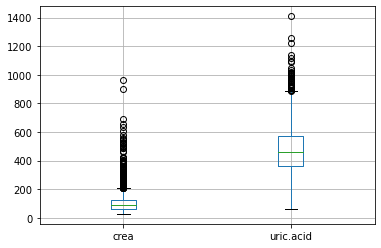

In [518]:
hf.boxplot(['crea','uric.acid']);

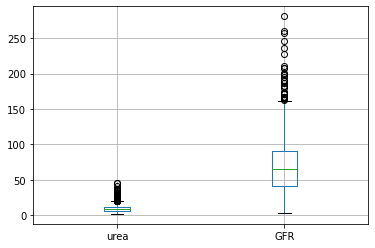

In [519]:
hf.boxplot(['urea','GFR']);

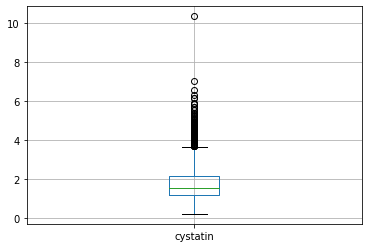

In [520]:
hf.boxplot('cystatin');

In [521]:
variables = ['crea','uric.acid','GFR','cystatin']
for variable in variables:
    impute_median(variable)

crea null value=  0
uric.acid null value=  0
GFR null value=  0
cystatin null value=  0


In [522]:
impute_mean('urea')

urea null value=  0


In [523]:
hf.iloc[:,60:65].isnull().sum()

WBC           27
mono.ratio    27
mono.ct       27
RBC           27
CV.RBC.DW     30
dtype: int64

In [524]:
NYHA_aggregate( ['WBC','mono.ratio','mono.ct','RBC', 'CV.RBC.DW'])

           WBC              mono.ratio                 mono.ct               \
          mean median  mode       mean median   mode      mean median  mode   
NYHA                                                                          
2     6.926199  6.420  4.62   0.068673  0.067  0.073  0.452895  0.415  0.38   
3     7.131245  6.455  4.71   0.067938  0.065  0.054  0.462957  0.410  0.33   
4     7.818723  6.790  5.82   0.069791  0.068  0.068  0.507021  0.440  0.44   

           RBC               CV.RBC.DW               
          mean median  mode       mean median  mode  
NYHA                                                 
2     3.906345  3.915  3.85  14.737830   14.3  14.0  
3     3.853755  3.890  3.58  14.797176   14.3  14.0  
4     3.831358  3.860  3.72  15.225410   14.7  14.9  


In [525]:
variables = ['WBC', 'mono.ct','CV.RBC.DW']
for variable in variables:
    impute_mean(variable)

WBC null value=  0
mono.ct null value=  0
CV.RBC.DW null value=  0


In [526]:
fill_mean( ['mono.ratio','RBC'])

['mono.ratio', 'RBC'] null=  mono.ratio    0
RBC           0
dtype: int64


In [527]:
hf.iloc[:,65:70].isnull().sum()

SD.RBC.DW    30
MCV          28
Hct          28
lymph.ct     27
MHV          28
dtype: int64

In [528]:
NYHA_aggregate(['SD.RBC.DW','MCV','Hct','lymph.ct', 'MHV'])

      SD.RBC.DW                     MCV                    Hct                \
           mean median  mode       mean median  mode      mean median   mode   
NYHA                                                                           
2     48.049267   47.1  43.5  91.579825  92.90  92.3  0.355102  0.360  0.379   
3     48.531061   47.6  45.9  92.131712  93.60  97.5  0.353405  0.360  0.403   
4     49.811148   48.8  47.9  92.071311  93.05  95.4  0.350802  0.357  0.378   

      lymph.ct                     MHV               
          mean median  mode       mean median  mode  
NYHA                                                 
2     1.081667  0.965  0.76  29.800877  30.45  31.5  
3     1.042743  0.950  1.09  30.031518  30.65  30.6  
4     0.987676  0.860  0.79  29.835082  30.40  31.4  


In [529]:
impute_mean('SD.RBC.DW')

SD.RBC.DW null value=  0


In [530]:
fill_mean(['MCV','Hct','lymph.ct','MHV'])

['MCV', 'Hct', 'lymph.ct', 'MHV'] null=  MCV         0
Hct         0
lymph.ct    0
MHV         0
dtype: int64


In [531]:
hf.iloc[:,70:74].isnull().sum()

MHC            27
MPV           103
baso.ratio     27
baso.ct        27
dtype: int64

In [532]:
NYHA_aggregate(['MHC','MPV','baso.ratio','baso.ct'])

             MHC                      MPV              baso.ratio         \
            mean median   mode       mean median  mode       mean median   
NYHA                                                                       
2     325.038012  326.0  323.0  12.167470  12.05  12.9   0.004713  0.004   
3     325.523346  327.0  328.0  12.161492  12.10  12.7   0.004431  0.004   
4     323.522095  326.0  326.0  12.000172  12.00  12.1   0.004794  0.004   

              baso.ct               
       mode      mean median  mode  
NYHA                                
2     0.003  0.031550   0.03  0.02  
3     0.003  0.029319   0.03  0.02  
4     0.003  0.033977   0.03  0.02  


In [533]:
fill_mean(['MHC','MPV','baso.ratio','baso.ct'])

['MHC', 'MPV', 'baso.ratio', 'baso.ct'] null=  MHC           0
MPV           0
baso.ratio    0
baso.ct       0
dtype: int64


In [534]:
hf.iloc[:,74:79].isnull().sum()

eo.ratio     27
eo.ct        27
Hb           28
Plt          27
P.DW        103
dtype: int64

In [535]:
NYHA_aggregate(['eo.ratio','eo.ct','Hb','Plt','P.DW'])

      eo.ratio                 eo.ct                       Hb                \
          mean median mode      mean median  mode        mean median   mode   
NYHA                                                                          
2     0.021833  0.011  0.0  0.142924   0.07  0.01  115.824561  117.0  134.0   
3     0.019123  0.010  0.0  0.122772   0.06  0.01  115.455253  118.0  114.0   
4     0.015606  0.008  0.0  0.100229   0.05  0.01  113.995082  117.0  120.0   

             Plt                     P.DW               
            mean median   mode       mean median  mode  
NYHA                                                    
2     145.400585  136.5  141.0  16.390361   16.3  16.3  
3     145.326848  135.0  118.0  16.372883   16.3  16.2  
4     144.707038  135.0   85.0  16.334251   16.3  16.1  


In [536]:
variables = ['eo.ratio','eo.ct','Hb','Plt','P.DW']
for variable in variables:
    impute_mean(variable)

eo.ratio null value=  0
eo.ct null value=  0
Hb null value=  0
Plt null value=  0
P.DW null value=  0


In [537]:
hf.iloc[:,79:84].isnull().sum()

Plt.hct       103
neut.ratio     27
neut.ct        27
Ddimer        168
INR            35
dtype: int64

In [538]:
NYHA_aggregate(['Plt.hct','neut.ratio','neut.ct','Ddimer','INR'])

       Plt.hct               neut.ratio                 neut.ct               \
          mean median   mode       mean median   mode      mean median  mode   
NYHA                                                                           
2     0.174822  0.167  0.154   0.734839  0.742  0.903  5.217135   4.72  2.93   
3     0.173777  0.164  0.144   0.747026  0.753  0.777  5.472879   4.78  3.27   
4     0.172888  0.168  0.180   0.766476  0.776  0.776  6.189787   5.06  4.12   

        Ddimer                    INR               
          mean median  mode      mean median  mode  
NYHA                                                
2     2.246460  1.115  0.60  1.307867   1.19  1.07  
3     2.220095  1.140  0.70  1.337896   1.21  1.16  
4     2.934817  1.410  1.01  1.394586   1.23  1.10  


In [539]:
fill_mean(['Plt.hct','neut.ratio','INR'])

['Plt.hct', 'neut.ratio', 'INR'] null=  Plt.hct       0
neut.ratio    0
INR           0
dtype: int64


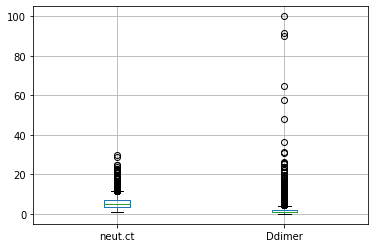

In [540]:
hf.boxplot( ['neut.ct','Ddimer']);

In [541]:
impute_mean('neut.ct')

neut.ct null value=  0


In [542]:
impute_median('Ddimer')

Ddimer null value=  0


In [543]:
hf.iloc[:,84:89].isnull().sum()

APTT          34
TT            34
PT.act        46
PT.ratio      35
fibrinogen    34
dtype: int64

In [544]:
NYHA_aggregate(['APTT','TT','PT.act','PT.ratio','fibrinogen'])

           APTT                      TT                  PT.act               \
           mean median  mode       mean median  mode       mean median  mode   
NYHA                                                                           
2     35.333718  33.80  31.7  17.160231   17.1  16.5  69.961541   71.6  73.2   
3     35.313894  34.15  33.5  17.019178   17.2  17.4  66.597929   68.5  74.9   
4     35.551405  34.40  33.9  17.672397   17.3  17.6  64.049884   66.4  74.0   

      PT.ratio              fibrinogen               
          mean median  mode       mean median  mode  
NYHA                                                 
2     1.311441   1.19  1.12   3.228156   3.10  2.70  
3     1.340685   1.22  1.22   3.227241   3.01  3.76  
4     1.398940   1.23  1.16   3.215587   3.08  3.69  


In [545]:
fill_mean(['APTT','TT','PT.ratio','fibrinogen'])

['APTT', 'TT', 'PT.ratio', 'fibrinogen'] null=  APTT          0
TT            0
PT.ratio      0
fibrinogen    0
dtype: int64


In [546]:
impute_mean('PT.act')

PT.act null value=  0


In [547]:
hf.iloc[:,89:94].isnull().sum()

troponin    79
CO2.BC      11
Ca          11
K           11
Cl          11
dtype: int64

In [548]:
NYHA_aggregate(['troponin','CO2.BC','Ca','K','Cl'])

      troponin                  CO2.BC                     Ca               \
          mean median  mode       mean median  mode      mean median  mode   
NYHA                                                                         
2     0.131911  0.040  0.00  24.305747   24.5  23.9  2.295661   2.30  2.26   
3     0.227756  0.048  0.00  24.056853   24.1  23.7  2.297857   2.29  2.23   
4     0.455648  0.074  0.06  23.131485   22.9  20.0  2.283100   2.28  2.27   

             K                       Cl                
          mean median  mode        mean median   mode  
NYHA                                                   
2     3.917845   3.84  3.58  102.054598  102.9  102.9  
3     3.961091   3.86  3.66  102.184266  102.9  105.1  
4     4.052007   3.92  3.84  100.969494  101.9  103.0  


In [549]:
fill_mean(['CO2.BC','Ca','K','Cl'])

['CO2.BC', 'Ca', 'K', 'Cl'] null=  CO2.BC    0
Ca        0
K         0
Cl        0
dtype: int64


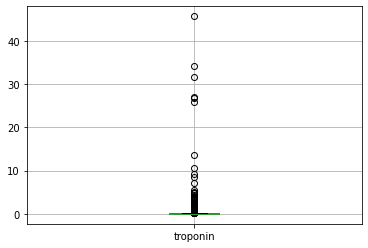

In [550]:
hf.boxplot('troponin');

In [551]:
impute_median('troponin')

troponin null value=  0


In [552]:
hf.iloc[:,94:99].isnull().sum()

Na            11
CK.enz.CK    241
HBD.LDH      241
HBD          241
ALT          253
dtype: int64

In [553]:
NYHA_aggregate(['Na','CK.enz.CK','HBD.LDH','HBD','AST'])

              Na               CK.enz.CK                HBD.LDH               \
            mean median   mode      mean median  mode      mean median  mode   
NYHA                                                                           
2     138.593103  139.2  138.0  0.218127   0.16  0.13  0.824084   0.83  0.83   
3     138.533880  139.0  141.0  0.207484   0.17  0.11  0.823713   0.83  0.85   
4     137.547635  138.6  140.0  0.212056   0.17  0.12  0.801514   0.81  0.81   

             HBD                      AST               
            mean median   mode       mean median  mode  
NYHA                                                    
2     208.803859  183.0  160.0  41.531343   20.0  11.0  
3     205.616721  183.0  187.0  42.739130   20.0  13.0  
4     236.411215  196.0  223.0  80.202234   22.0  10.0  


In [554]:
fill_mean(['Na','HBD.LDH'])

['Na', 'HBD.LDH'] null=  Na         0
HBD.LDH    0
dtype: int64


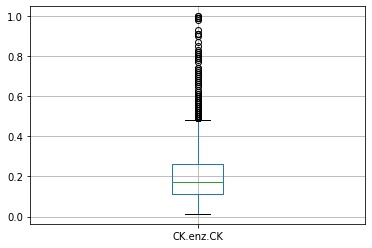

In [555]:
hf.boxplot('CK.enz.CK');

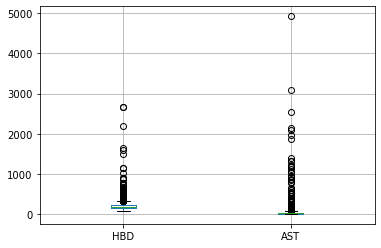

In [556]:
hf.boxplot(['HBD','AST']);

In [557]:
variables = ['CK.enz.CK','HBD','AST']
for variable in variables:
    impute_median(variable)

CK.enz.CK null value=  0
HBD null value=  0
AST null value=  0


In [558]:
hf.iloc[:,99:104].isnull().sum()

CK              241
CK.enz          241
LDH             241
BNP              35
nucleotidase    529
dtype: int64

In [559]:
NYHA_aggregate(['CK','CK.enz','LDH','BNP','nucleotidase'])

              CK                  CK.enz                      LDH         \
            mean median  mode       mean median  mode        mean median   
NYHA                                                                       
2     119.163987   90.0  64.0  19.148553   15.6   9.4  255.755627  224.0   
3     128.565689   89.0  70.0  18.476113   15.8  14.6  256.156352  225.0   
4     159.837383   97.0  73.0  22.314019   17.0  12.3  312.983178  243.0   

                     BNP                   nucleotidase              
       mode         mean    median    mode         mean median mode  
NYHA                                                                 
2     246.0   966.319138   529.815  5000.0     4.044788    2.9  2.9  
3     200.0  1173.827729   693.870  5000.0     4.120452    2.9  2.6  
4     211.0  1638.554030  1130.340  5000.0     4.706852    3.5  2.0  


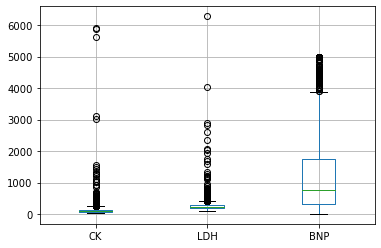

In [560]:
hf.boxplot(['CK','LDH','BNP']);

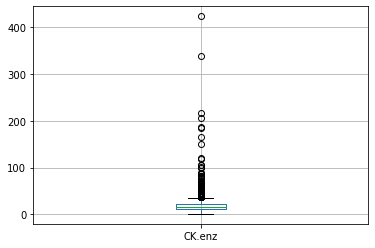

In [561]:
hf.boxplot(['CK.enz']);

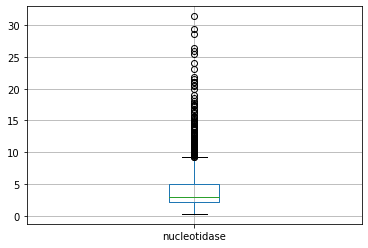

In [562]:
hf.boxplot(['nucleotidase']);

In [563]:
variables = ['CK','LDH', 'BNP', 'CK.enz', 'nucleotidase']
for variable in variables:
    impute_median(variable)

CK null value=  0
LDH null value=  0
BNP null value=  0
CK.enz null value=  0
nucleotidase null value=  0


In [564]:
hf.iloc[:,104:109].isnull().sum()

fucosidase      529
albumin         102
w.glob.ratio    102
GTP             102
AST               0
dtype: int64

In [565]:
NYHA_aggregate(['fucosidase','albumin','w.glob.ratio','GTP','ALT'])

     fucosidase                 albumin              w.glob.ratio              \
           mean median  mode       mean median  mode         mean median mode   
NYHA                                                                            
2     19.149807   18.2  17.1  36.713433   37.1  37.3     1.303582    1.3  1.4   
3     19.139841   18.3  19.2  36.770172   37.0  36.2     1.360364    1.4  1.3   
4     19.853105   19.2  14.7  36.025086   36.2  36.5     1.294845    1.3  1.3   

            GTP                     ALT               
           mean median  mode       mean median  mode  
NYHA                                                  
2     56.107463   34.0  15.0  37.201954   25.0  19.0  
3     57.720930   38.0  17.0  55.911926   25.0  18.0  
4     69.613402   44.0  18.0  90.687266   28.0  20.0  


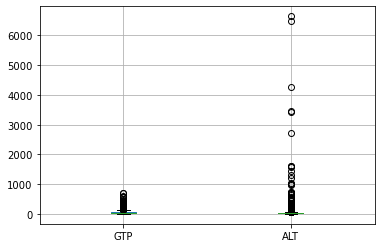

In [566]:
hf.boxplot(['GTP','ALT']);

In [567]:
variables = ['fucosidase','albumin','w.glob.ratio','GTP']
for variable in variables:
    impute_mean(variable)

fucosidase null value=  0
albumin null value=  0
w.glob.ratio null value=  0
GTP null value=  0


In [568]:
impute_median('ALT')

ALT null value=  0


In [569]:
hf.iloc[:,109:114].isnull().sum()

IB          102
AP          102
globulin    102
DB          102
TB          102
dtype: int64

In [570]:
NYHA_aggregate(['IB','AP','globulin','DB','TB'])

             IB                      AP                globulin               \
           mean median  mode       mean median  mode       mean median  mode   
NYHA                                                                           
2     12.733134   11.2  15.6  90.543284   78.0  78.0  29.267463   28.6  25.7   
3     13.563498   11.6   7.6  86.647118   79.0  57.0  28.150556   27.6  26.5   
4     14.522165   12.2   5.8  93.680412   82.0  94.0  28.879381   28.2  24.1   

             DB                     TB               
           mean median mode       mean median  mode  
NYHA                                                 
2      8.301791    5.8  2.7  21.034925   16.9  12.6  
3      8.261577    6.4  4.7  21.825076   18.3  20.5  
4     10.736942    7.1  5.3  25.259107   19.3  13.8  


In [571]:
variables = ['IB','globulin']
for variable in variables:
    impute_mean(variable)

IB null value=  0
globulin null value=  0


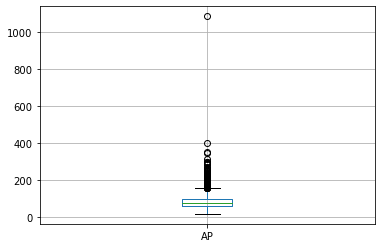

In [572]:
hf.boxplot('AP');

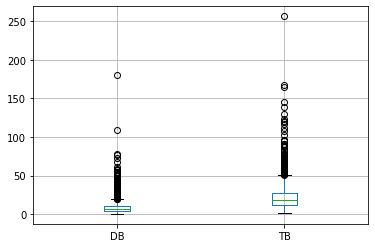

In [573]:
hf.boxplot(['DB','TB']);

In [574]:
variables = ['AP','DB','TB']
for variable in variables:
    impute_median(variable)

AP null value=  0
DB null value=  0
TB null value=  0


In [575]:
hf.iloc[:,114:120].isnull().sum()

bile            510
TP              102
cholesterol     198
LDL             198
triglyceride    198
HDL             198
dtype: int64

In [576]:
NYHA_aggregate(['bile','TP','cholesterol','LDL','triglyceride','HDL'])

           bile                     TP              cholesterol               \
           mean median mode       mean median  mode        mean median  mode   
NYHA                                                                           
2      7.270342    4.6  2.1  65.980896   65.2  65.2    3.860502   3.77  3.01   
3      7.843211    4.5  2.0  64.920728   64.7  66.1    3.687416   3.57  3.71   
4     10.435608    5.2  2.2  64.904467   64.5  68.4    3.705746   3.58  3.35   

           LDL              triglyceride                    HDL               
          mean median  mode         mean median  mode      mean median  mode  
NYHA                                                                          
2     1.953292   1.86  2.01     1.160846   0.95  1.23  1.128621   1.08  1.07  
3     1.833608   1.74  1.83     1.158270   0.98  0.82  1.101582   1.07  1.06  
4     1.853223   1.70  1.61     1.164475   0.92  0.84  1.091750   1.06  0.97  


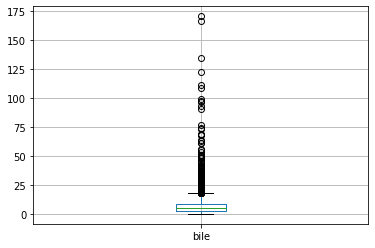

In [577]:
hf.boxplot(['bile']);

In [578]:
impute_median('bile')

bile null value=  0


In [579]:
variables = ['TP','cholesterol','LDL','triglyceride','HDL']
for variable in variables:
    impute_mean(variable)

TP null value=  0
cholesterol null value=  0
LDL null value=  0
triglyceride null value=  0
HDL null value=  0


In [580]:
hf.iloc[:,120:123].isnull().sum()

GCS          0
discharge    0
age          0
dtype: int64

In [581]:
hf.iloc[:,0-123].isnull().sum()

0

In [582]:
# all missing values filled

#### II. C.  Data Preparation:  Adjusting DTypes

In [583]:
hf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 123 columns):
 #   Column            Dtype  
---  ------            -----  
 0   destination       object 
 1   admission.way     object 
 2   occupation        object 
 3   visit.times       int64  
 4   gender            object 
 5   temp              float64
 6   HR                int64  
 7   RR                int64  
 8   SBP               int64  
 9   DBP               int64  
 10  MAP               float64
 11  Wt                float64
 12  Ht                float64
 13  BMI               float64
 14  HF.type           object 
 15  NYHA              int64  
 16  Killip            object 
 17  MI                int64  
 18  CHF               int64  
 19  PVD               int64  
 20  CVD               int64  
 21  dementia          int64  
 22  COPD              int64  
 23  CTD               int64  
 24  PUD               float64
 25  DM                int64  
 26  CKD               f

In [584]:
def integer(var):
    hf[var] = hf[var].astype('int')

In [585]:
integer(['Wt','Ht','BMI','PUD','CKD','liver.disease','CCI.score',
       'LVEDD','crea','uric.acid','GFR',
        'MCV','MHC','Hb','Plt','APTT','PT.act',
        'Cl','Na','HBD','AST','CK',
       'LDH','BNP','albumin','GTP','AP','TP' ])

In [586]:
hf['Killip'] = hf['Killip'].replace( {'I':1, 'II':2, 'III':3, 'IV':4})
hf['Killip'].value_counts().sort_index()

1     527
2    1029
3     392
4      60
Name: Killip, dtype: int64

In [587]:
hf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 123 columns):
 #   Column            Dtype  
---  ------            -----  
 0   destination       object 
 1   admission.way     object 
 2   occupation        object 
 3   visit.times       int64  
 4   gender            object 
 5   temp              float64
 6   HR                int64  
 7   RR                int64  
 8   SBP               int64  
 9   DBP               int64  
 10  MAP               float64
 11  Wt                int64  
 12  Ht                int64  
 13  BMI               int64  
 14  HF.type           object 
 15  NYHA              int64  
 16  Killip            int64  
 17  MI                int64  
 18  CHF               int64  
 19  PVD               int64  
 20  CVD               int64  
 21  dementia          int64  
 22  COPD              int64  
 23  CTD               int64  
 24  PUD               int64  
 25  DM                int64  
 26  CKD               i

In [588]:
# dtypes as appropriate

#### II. D.  Data Preparation:  Rechecking column values

In [589]:
hf.head()

,destination,admission.way,occupation,visit.times,gender,temp,HR,RR,SBP,DBP,MAP,Wt,Ht,BMI,HF.type,NYHA,Killip,MI,CHF,PVD,CVD,dementia,COPD,CTD,PUD,DM,CKD,hemiplegia,leukemia,lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,RespFailureII,consciousness,GCS.E,GCS.V,GCS.M,resp.support,O2,FiO2,ARF,LVEDD,hosp.outcome,mort.28d,read.28d,mort.3mo,read.3mo,mort.6mo,read.6mo,mort.time.fr.adm,read.time.fr.adm,ED.6mo,ED.time.6mo,crea,urea,uric.acid,GFR,cystatin,WBC,mono.ratio,mono.ct,RBC,CV.RBC.DW,SD.RBC.DW,MCV,Hct,lymph.ct,MHV,MHC,MPV,baso.ratio,baso.ct,eo.ratio,eo.ct,Hb,Plt,P.DW,Plt.hct,neut.ratio,neut.ct,Ddimer,INR,APTT,TT,PT.act,PT.ratio,fibrinogen,troponin,CO2.BC,Ca,K,Cl,Na,CK.enz.CK,HBD.LDH,HBD,ALT,CK,CK.enz,LDH,BNP,nucleotidase,fucosidase,albumin,w.glob.ratio,GTP,AST,IB,AP,globulin,DB,TB,bile,TP,cholesterol,LDL,triglyceride,HDL,GCS,discharge,age
0,Home,NonEmergency,UrbanResident,1,Male,36.7,87,19,102,64,76.666667,50,1,18,Both,3,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,52,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN,108,12.55,685,58,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94,0.387,1.51,32.0,338,14.0,0.006,0.05,0.002,0.02,131,102,16.6,0.142,0.746,7.05,1.19,1.39,33,17.0,60,1.37,3.84,0.094,21.6,2.28,5.59,101,134,0.22,0.630000,185,81.0,43,9.6,294,1500,3.5,20.5,38,1.6,83,65,11.4,61,23.8,6.9,18.3,4.9,61,3.46,1.90,2.69,0.84,15,11,"(69,79]"
1,Home,NonEmergency,UrbanResident,1,Female,36.8,95,18,150,70,96.666667,51,1,19,Both,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,40,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN,62,4.29,170,85,1.25,5.32,0.066,0.35,3.93,13.0,40.7,88,0.349,1.18,28.9,326,11.3,0.002,0.01,0.009,0.05,114,123,16.1,0.139,0.702,3.73,1.06,1.16,35,18.4,65,1.18,2.62,0.017,26.5,2.28,3.62,105,144,0.16,0.840000,170,21.0,107,17.2,203,361,2.2,21.9,40,1.6,17,19,13.1,69,25.4,5.2,18.3,2.4,66,3.15,1.26,0.84,1.30,15,8,"(69,79]"
2,Home,NonEmergency,farmer,2,Male,36.5,98,18,102,67,78.666667,70,1,24,Both,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,46,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN,185,15.99,567,31,2.43,13.01,0.051,0.67,4.43,12.9,44.5,96,0.427,0.75,32.6,339,12.0,0.002,0.03,0.002,0.02,144,169,16.5,0.203,0.887,11.54,0.83,1.10,36,14.9,85,1.09,5.74,0.010,21.6,2.56,4.15,107,142,0.38,0.770000,105,9.0,38,14.6,137,293,2.3,12.3,33,1.2,27,10,7.5,76,27.7,4.4,11.9,2.4,60,3.79,2.13,1.53,0.94,15,5,"(59,69]"
3,Home,Emergency,UrbanResident,1,Male,36.0,73,19,110,74,86.000000,65,1,22,Both,3,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,52,Alive,0,1,0,1,0,1,NaN,19.0,1.0,19.0,104,8.16,635,58,2.32,2.18,0.087,0.19,2.71,18.8,69.0,102,0.277,0.71,34.7,339,12.4,0.000,0.00,0.028,0.06,94,35,19.4,0.032,0.559,1.22,1.39,1.37,38,18.3,60,1.36,2.63,0.349,21.1,2.35,3.76,101,136,0.17,0.817057,183,25.0,89,15.8,225,1071,11.2,19.4,40,1.5,134,9,26.2,191,27.0,25.4,51.6,9.4,67,2.92,1.31,0.92,0.98,15,11,"(69,79]"
4,Home,NonEmergency,UrbanResident,1,Female,35.0,88,19,134,62,86.000000,76,1,31,Both,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,None,OxygenTherapy,33,0,64,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN,83,6.86,432,60,1.35,6.14,0.086,0.53,4.20,14.7,47.7,90,0.378,1.27,28.6,317,12.6,0.002,0.01,0.008,0.05,120,104,16.4,0.131,0.697,4.28,0.57,1.19,34,16.4,74,1.19,3.50,0.115,22.8,2.42,3.94,104,136,0.11,0.920000,270,30.0,122,13.6,295,372,2.9,12.3,42,1.4,17,19,6.9,61,29.6,4.9,11.8,3.3,71,2.68,1.21,0.62,0.91,15,5,"(69,79]"


In [590]:
hf['resp.support'] = hf['resp.support'].replace({'None':'NoSupport'})

#### II. E.  Data Preparation:  Rearranging Columns

In [591]:
# rearrange columns to general flow of demographics -> labs -> outcome

In [592]:
hf= hf.reindex(columns = ['age','gender','occupation','visit.times','admission.way',
                      'HR','RR','SBP','DBP','MAP','temp','Wt','Ht','BMI',
                      'consciousness','GCS','GCS.E','GCS.V','GCS.M',
                      'CHF','HF.type','NYHA','MI','Killip',
                      'DM','PVD','CVD','CKD','ARF',
                      'COPD','RespFailureII','resp.support','O2','FiO2',
                      'CTD','PUD','liver.disease',
                      'dementia','hemiplegia',
                      'leukemia','lymphoma','solid.tumor','AIDS','CCI.score',
                      'LVEDD',
                      'WBC','mono.ct','mono.ratio','neut.ct','neut.ratio',
                      'lymph.ct','baso.ct','baso.ratio','eo.ct','eo.ratio',
                      'RBC','Hb','Hct','CV.RBC.DW','SD.RBC.DW','MCV','MHV','MHC',
                      'Plt','MPV','P.DW','Plt.hct',
                      'INR','APTT','TT','PT.act','PT.ratio', 'Ddimer','fibrinogen',
                      'CK','CK.enz','CK.enz.CK',
                      'GFR','crea','urea','uric.acid','cystatin',
                      'CO2.BC','Na','K','Cl','Ca',
                      'HBD.LDH','HBD','AST','LDH','BNP','nucleotidase','fucosidase',
                      'albumin','globulin','w.glob.ratio','GTP','ALT','DB','IB','TB',
                      'AP','bile','TP',
                      'cholesterol','LDL','HDL','triglyceride',
                      'hosp.outcome','discharge','destination',
                      'mort.28d','mort.3mo','mort.6mo', 'mort.time.fr.adm',
                      'read.28d','read.3mo','read.6mo','read.time.fr.adm',
                      'ED.6mo','ED.time.6mo'])
hf.head()

,age,gender,occupation,visit.times,admission.way,HR,RR,SBP,DBP,MAP,temp,Wt,Ht,BMI,consciousness,GCS,GCS.E,GCS.V,GCS.M,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,CTD,PUD,liver.disease,dementia,hemiplegia,leukemia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,WBC,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,fibrinogen,CK,CK.enz,CK.enz.CK,GFR,crea,urea,uric.acid,cystatin,CO2.BC,Na,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,BNP,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,discharge,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,read.28d,read.3mo,read.6mo,read.time.fr.adm,ED.6mo,ED.time.6mo
0,"(69,79]",Male,UrbanResident,1,NonEmergency,87,19,102,64,76.666667,36.7,50,1,18,Clear,15,4,5,6,0,Both,3,0,3,1,0,0,0,0,1,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,2,52,9.43,0.80,0.085,7.05,0.746,1.51,0.05,0.006,0.02,0.002,4.09,131,0.387,15.0,50.3,94,32.0,338,102,14.0,16.6,0.142,1.39,33,17.0,60,1.37,1.19,3.84,43,9.6,0.22,58,108,12.55,685,1.32,21.6,134,5.59,101,2.28,0.630000,185,65,294,1500,3.5,20.5,38,23.8,1.6,83,81.0,6.9,11.4,18.3,61,4.9,61,3.46,1.90,0.84,2.69,Alive,11,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
1,"(69,79]",Female,UrbanResident,1,NonEmergency,95,18,150,70,96.666667,36.8,51,1,19,Clear,15,4,5,6,0,Both,3,0,1,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,0,40,5.32,0.35,0.066,3.73,0.702,1.18,0.01,0.002,0.05,0.009,3.93,114,0.349,13.0,40.7,88,28.9,326,123,11.3,16.1,0.139,1.16,35,18.4,65,1.18,1.06,2.62,107,17.2,0.16,85,62,4.29,170,1.25,26.5,144,3.62,105,2.28,0.840000,170,19,203,361,2.2,21.9,40,25.4,1.6,17,21.0,5.2,13.1,18.3,69,2.4,66,3.15,1.26,1.30,0.84,Alive,8,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
2,"(59,69]",Male,farmer,2,NonEmergency,98,18,102,67,78.666667,36.5,70,1,24,Clear,15,4,5,6,0,Both,2,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,0,46,13.01,0.67,0.051,11.54,0.887,0.75,0.03,0.002,0.02,0.002,4.43,144,0.427,12.9,44.5,96,32.6,339,169,12.0,16.5,0.203,1.10,36,14.9,85,1.09,0.83,5.74,38,14.6,0.38,31,185,15.99,567,2.43,21.6,142,4.15,107,2.56,0.770000,105,10,137,293,2.3,12.3,33,27.7,1.2,27,9.0,4.4,7.5,11.9,76,2.4,60,3.79,2.13,0.94,1.53,Alive,5,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN
3,"(69,79]",Male,UrbanResident,1,Emergency,73,19,110,74,86.000000,36.0,65,1,22,Clear,15,4,5,6,0,Both,3,0,2,0,0,0,1,0,1,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,2,52,2.18,0.19,0.087,1.22,0.559,0.71,0.00,0.000,0.06,0.028,2.71,94,0.277,18.8,69.0,102,34.7,339,35,12.4,19.4,0.032,1.37,38,18.3,60,1.36,1.39,2.63,89,15.8,0.17,58,104,8.16,635,2.32,21.1,136,3.76,101,2.35,0.817057,183,9,225,1071,11.2,19.4,40,27.0,1.5,134,25.0,25.4,26.2,51.6,191,9.4,67,2.92,1.31,0.98,0.92,Alive,11,Home,0,0,0,NaN,1,1,1,19.0,1.0,19.0
4,"(69,79]",Female,UrbanResident,1,NonEmergency,88,19,134,62,86.000000,35.0,76,1,31,Clear,15,4,5,6,0,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,0,0,0,0,0,0,0,0,0,0,64,6.14,0.53,0.086,4.28,0.697,1.27,0.01,0.002,0.05,0.008,4.20,120,0.378,14.7,47.7,90,28.6,317,104,12.6,16.4,0.131,1.19,34,16.4,74,1.19,0.57,3.50,122,13.6,0.11,60,83,6.86,432,1.35,22.8,136,3.94,104,2.42,0.920000,270,19,295,372,2.9,12.3,42,29.6,1.4,17,30.0,4.9,6.9,11.8,61,3.3,71,2.68,1.21,0.91,0.62,Alive,5,Home,0,0,0,NaN,0,0,0,NaN,0.0,NaN


In [593]:
# data ready for analysis
# defer conversion to dummy variables for now, to facilitate labeling during visualization

In [594]:
# saving DF 
hf.to_csv('~/Desktop/hf.csv')